In [1]:
from scikeras.wrappers import KerasClassifier


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed

import os

print(os.getcwd())


from scikeras.wrappers import KerasClassifier
from sklearn.metrics import f1_score
# LOADING LIBRARIES
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential, Model
from keras.layers import Dense, Input

import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# print(os.listdir("../input"))
print('done')

C:\Users\Amir\AI\titanic
done


In [13]:
train = pd.read_csv('C:/Users/Amir/Downloads/train_dataset_GAN (3).csv')



In [15]:
train = train.astype('float32')
train.head()

,Survived,Pclass,SibSp,Parch,FamilySize,Sex_0,Sex_1,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_0,Em_type_1,Em_type_2,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
X = train.drop(columns='Survived')
#didnt use Title
y = train['Survived']


In [19]:
X.head()

,Pclass,SibSp,Parch,FamilySize,Sex_0,Sex_1,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_0,Em_type_1,Em_type_2,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
X.shape , 

((6891, 22),)

In [23]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size =600 )

In [25]:
X_train.shape

(6291, 22)

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Parameters
input_dim = 22  # Number of features in the input data
num_heads = 2   # Number of heads in Multi-Head Attention
d_model = 64    # Dimension of the model (embedding size)
num_blocks = 2  # Number of transformer blocks
dropout_rate = 0.2  # Dropout rate for regularization
batch_size = 32  # Batch size for training
nb_epoch = 500   # Number of epochs for training

# Transformer block with multiple attention layers
def transformer_block(inputs):
    # First Attention Layer
    attention_output_1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(inputs, inputs)
    attention_output_1 = layers.Dropout(dropout_rate)(attention_output_1)  # Dropout for regularization
    attention_output_1 = layers.LayerNormalization(epsilon=1e-6)(inputs + attention_output_1)  # Add & Normalize

    # Second Attention Layer
    attention_output_2 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(attention_output_1, attention_output_1)
    attention_output_2 = layers.Dropout(dropout_rate)(attention_output_2)  # Dropout for regularization
    attention_output_2 = layers.LayerNormalization(epsilon=1e-6)(attention_output_1 + attention_output_2)  # Add & Normalize

    # Third Attention Layer
    attention_output_3 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(attention_output_2, attention_output_2)
    attention_output_3 = layers.Dropout(dropout_rate)(attention_output_3)  # Dropout for regularization
    attention_output_3 = layers.LayerNormalization(epsilon=1e-6)(attention_output_2 + attention_output_3)  # Add & Normalize

    # Fourth Attention Layer
    attention_output_4 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(attention_output_3, attention_output_3)
    attention_output_4 = layers.Dropout(dropout_rate)(attention_output_4)  # Dropout for regularization
    attention_output_4 = layers.LayerNormalization(epsilon=1e-6)(attention_output_3 + attention_output_4)  # Add & Normalize

    # Feed Forward Network (FFN)
    ffn_output = layers.Dense(d_model, activation='relu')(attention_output_4)  # Dense layer with ReLU activation
    ffn_output = layers.Dense(input_dim)(ffn_output)  # Output layer for the FFN
    ffn_output = layers.Dropout(dropout_rate)(ffn_output)  # Dropout for regularization
    
    # Output of the transformer block after normalization
    return layers.LayerNormalization(epsilon=1e-6)(attention_output_4 + ffn_output)

# Input layer
inputs = layers.Input(shape=(1, input_dim))  # Input shape (batch_size, sequence_length, num_features)

# Apply transformer blocks
x = inputs
for _ in range(num_blocks):
    x = transformer_block(x)

# Output layer for binary classification
outputs = layers.Dense(1, activation='sigmoid')(x)  # Sigmoid activation for binary classification

# Build the model
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming X_train and y_train are defined, reshape the data for the transformer model
X_test_np = X_test.to_numpy()  # Convert test data to numpy array
X_test_reshaped = X_test_np.reshape(X_test_np.shape[0], 1, input_dim)  # Reshape for transformer input

X_train_np = X_train.to_numpy()  # Convert training data to numpy array
X_train_reshaped = X_train_np.reshape(X_train_np.shape[0], 1, input_dim)  # Reshape for transformer input

# Train the model with the reshaped data
history2 = model.fit(X_train_reshaped, y_train, 
                       batch_size=batch_size, 
                       epochs=nb_epoch, 
                       validation_data=(X_test_reshaped, y_test), 
                       verbose=2)  # Training with verbose output


Epoch 1/500


C:\Users\Amir\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


197/197 - 99s - 503ms/step - accuracy: 0.5153 - loss: nan - val_accuracy: 0.5117 - val_loss: nan
Epoch 2/500
197/197 - 7s - 36ms/step - accuracy: 0.5153 - loss: nan - val_accuracy: 0.5117 - val_loss: nan
Epoch 3/500
197/197 - 6s - 29ms/step - accuracy: 0.5153 - loss: nan - val_accuracy: 0.5117 - val_loss: nan
Epoch 4/500
197/197 - 6s - 30ms/step - accuracy: 0.5153 - loss: nan - val_accuracy: 0.5117 - val_loss: nan
Epoch 5/500
197/197 - 5s - 27ms/step - accuracy: 0.5153 - loss: nan - val_accuracy: 0.5117 - val_loss: nan
Epoch 6/500
197/197 - 6s - 32ms/step - accuracy: 0.5153 - loss: nan - val_accuracy: 0.5117 - val_loss: nan
Epoch 7/500
197/197 - 7s - 34ms/step - accuracy: 0.5153 - loss: nan - val_accuracy: 0.5117 - val_loss: nan
Epoch 8/500
197/197 - 10s - 50ms/step - accuracy: 0.5153 - loss: nan - val_accuracy: 0.5117 - val_loss: nan
Epoch 9/500
197/197 - 6s - 30ms/step - accuracy: 0.5153 - loss: nan - val_accuracy: 0.5117 - val_loss: nan
Epoch 10/500
197/197 - 7s - 36ms/step - accura

In [798]:
# Convert X_train to a NumPy array and reshape the input to the appropriate shape for the transformer model
X_test_np = X_test.to_numpy()  # Convert the test data (X_test) to a NumPy array
X_test_reshaped = X_test_np.reshape(X_test_np.shape[0], 1, input_dim)  # Reshape the data for transformer input (batch_size, sequence_length, num_features)

# Predict using the trained model
y_pred = model.predict(X_test_reshaped)  # Make predictions on the reshaped test data

# Print the model predictions
print("Model predictions:", y_pred)  # Output the predictions made by the model


C:\Users\Amir\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


10/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

C:\Users\Amir\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
Model predictions: [[[0.6914558 ]]

 [[0.1489732 ]]

 [[0.11847724]]

 [[0.90920955]]

 [[0.9940421 ]]

 [[0.1046112 ]]

 [[0.90920955]]

 [[0.99469334]]

 [[0.99512345]]

 [[0.10244931]]

 [[0.12149126]]

 [[0.90920955]]

 [[0.09538559]]

 [[0.17194717]]

 [[0.10317061]]

 [[0.17194717]]

 [[0.20817201]]

 [[0.5094812 ]]

 [[0.9940421 ]]

 [[0.9944076 ]]

 [[0.6917597 ]]

 [[0.99502325]]

 [[0.9926365 ]]

 [[0.14521143]]

 [[0.9956281 ]]

 [[0.09000871]]

 [[0.15846594]]

 [[0.10244931]]

 [[0.12149126]]

 [[0.90920955]]

 [[0.10244931]]

 [[0.12149126]]

 [[0.9945381 ]]

 [[0.91392994]]

 [[0.12157138]]

 [[0.10802057]]

 [[0.11847724]]

 [[0.4926479 ]]

 [[0.09323625]]

 [[0.10761459]]

 [[0.12149126]]

 [[0.17194717]]

 [[0.5165124 ]]

 [[0.09000871]]

 [[0.990187  ]]

 [[0.21997227]]

 [[0.90920955]]

 [[0.12549454]]

 [[0.9944036 ]]

 [[0.09392635]]

 [[0.4926479 ]]

 [[0.10985094]]

 [[0.09623243]]

 [[0.09323625]]

 [[0.33525363]]

 [[0.0

In [800]:
# Convert the predictions to a one-dimensional array
probabilities = y_pred.flatten()  # Flatten the predicted probabilities into a 1D array

# Set a threshold to classify the predictions
threshold = 0.5  # Threshold for classification, where values greater than 0.5 are classified as 1, otherwise 0

# Convert probabilities to binary predictions based on the threshold
predictions = (probabilities > threshold).astype(int)  # If probability > 0.5, classify as 1, else 0

# Display the predictions
print(predictions)  # Output the final binary predictions (0 or 1)


[1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1
 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1
 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1
 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 

In [802]:
print("Dimensions of y_test:", y_test.shape)
print("Dimensions of y_pred_classes:", predictions.shape)


Dimensions of y_test: (600,)
Dimensions of y_pred_classes: (600,)


In [804]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

# Calculate F1 Score
f1 = f1_score(y_test, predictions)  # F1 score is the harmonic mean of precision and recall
print(f'F1 Score: {f1}')  # Display the F1 score

# Calculate Accuracy
accuracy = accuracy_score(y_test, predictions)  # Accuracy is the ratio of correct predictions to total predictions
print(f'Accuracy: {accuracy}')  # Display the accuracy

# Generate Classification Report
report = classification_report(y_test, predictions)  # Generates a detailed classification report including precision, recall, F1-score, etc.
print(f'Classification Report:\n{report}')  # Display the classification report


F1 Score: 0.6993006993006993
Accuracy: 0.785
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       377
         1.0       0.73      0.67      0.70       223

    accuracy                           0.79       600
   macro avg       0.77      0.76      0.77       600
weighted avg       0.78      0.79      0.78       600



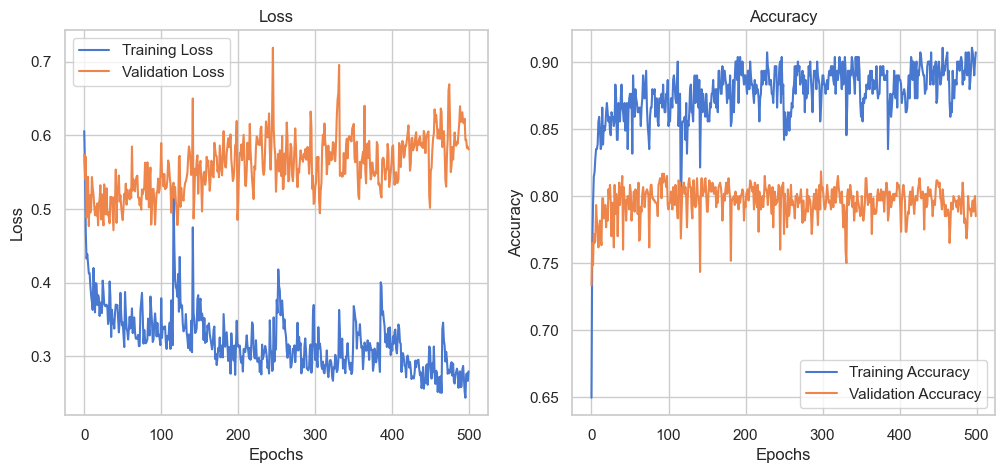

In [806]:
import matplotlib.pyplot as plt

# Extract training and validation data from the training history
train_loss = history2.history['loss']  # Training loss values over epochs
val_loss = history2.history['val_loss']  # Validation loss values over epochs
train_acc = history2.history['accuracy']  # Training accuracy values over epochs
val_acc = history2.history['val_accuracy']  # Validation accuracy values over epochs

# Plotting the loss and accuracy
plt.figure(figsize=(12, 5))  # Set the figure size

# Loss plot
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, 1st plot)
plt.plot(train_loss, label='Training Loss')  # Plot the training loss
plt.plot(val_loss, label='Validation Loss')  # Plot the validation loss
plt.title('Loss')  # Title of the loss plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()  # Display the legend

# Accuracy plot
plt.subplot(1, 2, 2)  # Create a subplot (1 row, 2 columns, 2nd plot)
plt.plot(train_acc, label='Training Accuracy')  # Plot the training accuracy
plt.plot(val_acc, label='Validation Accuracy')  # Plot the validation accuracy
plt.title('Accuracy')  # Title of the accuracy plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # Display the legend

# Show the plots
plt.show()  # Display the plots


In [808]:
print(history2.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [810]:
#-------------------------------------------------------------------------






In [812]:
test = pd.read_csv("C:/Users/Amir/Downloads/my_test.csv")

In [814]:


test = test.astype('float32')


drop_column = test['PassengerId']
test.drop(['PassengerId'], axis=1, inplace = True)
test.head()





,Pclass,SibSp,Parch,FamilySize,Sex_0,Sex_1,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_0,Em_type_1,Em_type_2,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,3.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [816]:
test_np = test.to_numpy()  
test_reshaped = test_np.reshape(test_np.shape[0], 1, input_dim) 


In [818]:
result =model.predict(test_reshaped)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [820]:
# Flatten the result to a 1D array
result = result.flatten()  # Converts the result array into a one-dimensional array

# Set the threshold for class prediction
threshold = 0.5  # A threshold value to classify the predictions

# Apply the threshold to determine the class (0 or 1)
result1 = (result > threshold).astype(int)  # If result > threshold, classify as 1, else 0

# Display the predictions
print(result1)  # Print the predicted class labels (0 or 1)


[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [822]:
drop_column.shape , result1.shape ,type(drop_column) ,type(result1)

((418,), (418,), pandas.core.series.Series, numpy.ndarray)

In [824]:
drop_column = drop_column.to_numpy()



In [826]:
result_OG = np.column_stack((drop_column, result1))

In [828]:
result_OG

array([[ 892.,    0.],
       [ 893.,    0.],
       [ 894.,    0.],
       [ 895.,    0.],
       [ 896.,    0.],
       [ 897.,    0.],
       [ 898.,    1.],
       [ 899.,    0.],
       [ 900.,    1.],
       [ 901.,    0.],
       [ 902.,    0.],
       [ 903.,    0.],
       [ 904.,    1.],
       [ 905.,    0.],
       [ 906.,    1.],
       [ 907.,    1.],
       [ 908.,    0.],
       [ 909.,    0.],
       [ 910.,    0.],
       [ 911.,    0.],
       [ 912.,    0.],
       [ 913.,    1.],
       [ 914.,    1.],
       [ 915.,    1.],
       [ 916.,    1.],
       [ 917.,    0.],
       [ 918.,    1.],
       [ 919.,    0.],
       [ 920.,    0.],
       [ 921.,    0.],
       [ 922.,    0.],
       [ 923.,    0.],
       [ 924.,    1.],
       [ 925.,    1.],
       [ 926.,    1.],
       [ 927.,    0.],
       [ 928.,    0.],
       [ 929.,    0.],
       [ 930.,    0.],
       [ 931.,    0.],
       [ 932.,    0.],
       [ 933.,    0.],
       [ 934.,    0.],
       [ 93

In [830]:
result_OG = result_OG.astype(np.float32)


In [832]:
np.set_printoptions(suppress=True)

print(result_OG)


[[ 892.    0.]
 [ 893.    0.]
 [ 894.    0.]
 [ 895.    0.]
 [ 896.    0.]
 [ 897.    0.]
 [ 898.    1.]
 [ 899.    0.]
 [ 900.    1.]
 [ 901.    0.]
 [ 902.    0.]
 [ 903.    0.]
 [ 904.    1.]
 [ 905.    0.]
 [ 906.    1.]
 [ 907.    1.]
 [ 908.    0.]
 [ 909.    0.]
 [ 910.    0.]
 [ 911.    0.]
 [ 912.    0.]
 [ 913.    1.]
 [ 914.    1.]
 [ 915.    1.]
 [ 916.    1.]
 [ 917.    0.]
 [ 918.    1.]
 [ 919.    0.]
 [ 920.    0.]
 [ 921.    0.]
 [ 922.    0.]
 [ 923.    0.]
 [ 924.    1.]
 [ 925.    1.]
 [ 926.    1.]
 [ 927.    0.]
 [ 928.    0.]
 [ 929.    0.]
 [ 930.    0.]
 [ 931.    0.]
 [ 932.    0.]
 [ 933.    0.]
 [ 934.    0.]
 [ 935.    1.]
 [ 936.    1.]
 [ 937.    0.]
 [ 938.    0.]
 [ 939.    0.]
 [ 940.    1.]
 [ 941.    1.]
 [ 942.    1.]
 [ 943.    0.]
 [ 944.    1.]
 [ 945.    0.]
 [ 946.    0.]
 [ 947.    0.]
 [ 948.    0.]
 [ 949.    0.]
 [ 950.    0.]
 [ 951.    1.]
 [ 952.    0.]
 [ 953.    0.]
 [ 954.    0.]
 [ 955.    1.]
 [ 956.    1.]
 [ 957.    1.]
 [ 958.   

In [834]:
# تبدیل آرایه NumPy به DataFrame
predict = pd.DataFrame(result_OG)
predict = predict.astype(int)

predict.columns = ['PassengerId', 'Survived']

# ذخیره کردن DataFrame به CSV
predict.to_csv('titanic_predict_transformer.csv', index=False)
predict , predict.dtypes

(     PassengerId  Survived
 0            892         0
 1            893         0
 2            894         0
 3            895         0
 4            896         0
 ..           ...       ...
 413         1305         0
 414         1306         1
 415         1307         0
 416         1308         0
 417         1309         1
 
 [418 rows x 2 columns],
 PassengerId    int32
 Survived       int32
 dtype: object)